# 🦟 Dengue Hematological Dataset (Bangladesh)

## 📌 Overview
This dataset was collected from **Jamalpur 250-Bed General Hospital, Bangladesh**, between **February 10, 2024 – September 27, 2024**.  
It contains **1,523 patient records** with both **demographic** and **hematological features** relevant to dengue diagnosis.

## 📂 Dataset Details
- **Number of Records**: 1,523 patients  
- **Number of Features**: 19 columns  
- **Data Type**: Tabular (CSV)  

### 🔑 Features
- **Demographics**: Age, Gender  
- **Hematological Parameters**:  
  - Hemoglobin, RBC, WBC, Neutrophils, Lymphocytes, Monocytes, Eosinophils, Basophils  
  - Platelet count, Mean Corpuscular Volume (MCV), Mean Corpuscular Hemoglobin (MCH), Mean Platelet Volume (MPV), Platelet Distribution Width (PDW)  
- **Target Variable**: Dengue Test Result (**Positive / Negative**)  

## 🎯 Use Cases
This dataset is suitable for:
- Dengue **diagnosis prediction models**  
- **Severity classification** based on blood parameters  
- **Biostatistical analysis** of hematological changes in dengue patients  
- Educational use for **ML in healthcare research**  

---
📖 **Source**: [Mendeley Data – Dengue Hematological Dataset (Bangladesh)](https://data.mendeley.com/datasets/6fsrsk3mb8/2)  


## Imports Libraries

In [1]:
# 📚 Data Handling
import pandas as pd         # For loading and handling tabular data
import numpy as np          # For numerical operations

# 🔍 Data Visualization
import matplotlib.pyplot as plt   # For plots
import seaborn as sns             # For statistical visualizations
sns.set(style="whitegrid")        # Nice default style for plots

# ⚙️ Preprocessing & ML
from sklearn.model_selection import train_test_split  # Split dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🧠 ML Models (if you plan to use them)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 🔔 Optional: Ignore warnings
import warnings
warnings.filterwarnings("ignore")


## Dataset

In [3]:
df = pd.read_csv('F:\Research\Dengue_Fever\Dataset\Dengue Fever Hematological Dataset.csv')
df.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1523 non-null   object 
 1   Age                          1523 non-null   int64  
 2   Hemoglobin(g/dl)             1523 non-null   float64
 3   Neutrophils(%)               1523 non-null   int64  
 4   Lymphocytes(%)               1523 non-null   int64  
 5   Monocytes(%)                 1523 non-null   int64  
 6   Eosinophils(%)               1523 non-null   int64  
 7   RBC                          1523 non-null   int64  
 8   HCT(%)                       1523 non-null   float64
 9   MCV(fl)                      1523 non-null   float64
 10  MCH(pg)                      1523 non-null   float64
 11  MCHC(g/dl)                   1523 non-null   float64
 12  RDW-CV(%)                    1523 non-null   float64
 13  Total Platelet Cou

In [5]:
df.describe()

,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm)
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,40.310571,14.513451,44.484570,43.559422,3.270519,3.083388,4.765594,45.189280,89.815561,29.897225,32.050271,13.635792,173127.170716,9.588806,15.312966,0.289080,5483.024951
std,15.286190,1.627142,4.344736,4.972815,1.209507,1.000791,0.722874,3.566435,5.515619,2.026022,1.551697,1.430746,64832.681751,0.848706,1.405457,5.992864,1137.344040
min,5.000000,10.400000,29.000000,29.000000,2.000000,1.000000,4.000000,36.300000,80.000000,22.900000,27.080000,11.000000,56000.000000,7.500000,8.400000,0.000020,3500.000000
25%,28.000000,13.200000,42.000000,41.000000,2.000000,2.000000,4.000000,42.595000,85.100000,28.400000,30.900000,12.400000,114907.000000,8.900000,14.230000,0.106000,4626.000000
50%,39.000000,14.600000,45.000000,44.000000,3.000000,3.000000,5.000000,45.550000,89.700000,30.000000,32.000000,13.800000,167385.000000,9.660000,15.260000,0.141000,5397.000000
75%,53.000000,15.800000,48.000000,47.000000,4.000000,4.000000,5.000000,47.840000,94.200000,31.400000,33.200000,14.700000,228649.500000,10.283000,16.400000,0.173000,6131.500000
max,78.000000,17.500000,60.000000,56.000000,9.000000,9.000000,7.000000,51.980000,100.000000,34.000000,35.000000,21.330000,299803.000000,11.235000,17.990000,234.000000,14900.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)',
       'Monocytes(%)', 'Eosinophils(%)', 'RBC', 'HCT(%)', 'MCV(fl)', 'MCH(pg)',
       'MCHC(g/dl)', 'RDW-CV(%)', 'Total Platelet Count(/cumm)', 'MPV(fl)',
       'PDW(%)', 'PCT(%)', 'Total WBC count(/cumm)', 'Result'],
      dtype='object')

In [7]:
df.missing_values = df.isnull().sum()
df.missing_values

Gender                         0
Age                            0
Hemoglobin(g/dl)               0
Neutrophils(%)                 0
Lymphocytes(%)                 0
Monocytes(%)                   0
Eosinophils(%)                 0
RBC                            0
HCT(%)                         0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dl)                     0
RDW-CV(%)                      0
Total Platelet Count(/cumm)    0
MPV(fl)                        0
PDW(%)                         0
PCT(%)                         0
Total WBC count(/cumm)         0
Result                         0
dtype: int64

## Visualization

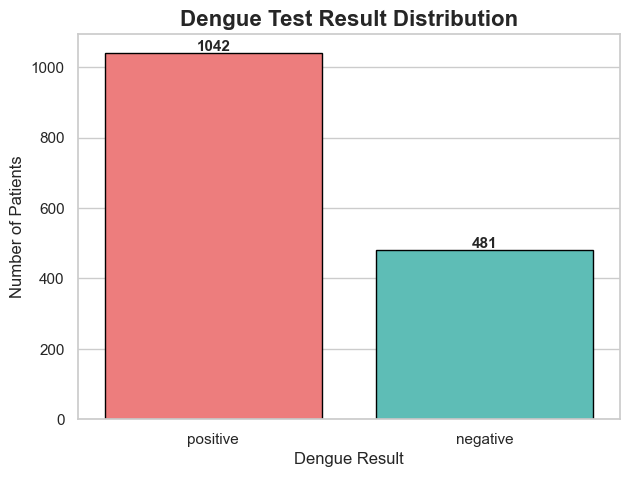

In [9]:
plt.figure(figsize=(7,5))
colors = ['#FF6B6B','#4ECDC4']  # Attractive red and teal
sns.countplot(x='Result', data=df, palette=colors, edgecolor='black')
plt.title('Dengue Test Result Distribution', fontsize=16, weight='bold')
plt.xlabel('Dengue Result', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add value labels on top
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()+5),
                       ha='center', fontsize=11, weight='bold')
plt.show()


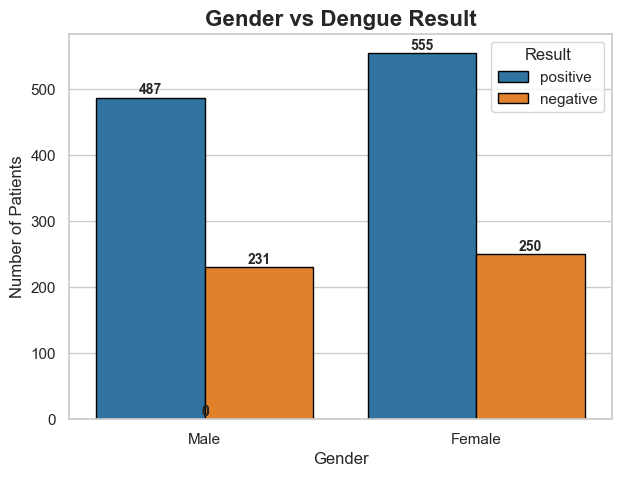

In [10]:
plt.figure(figsize=(7,5))
colors = ['#1f77b4','#ff7f0e']  # Blue for Male, Orange for Female
sns.countplot(x='Gender', hue='Result', data=df, palette=colors, edgecolor='black')
plt.title('Gender vs Dengue Result', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()+5),
                       ha='center', fontsize=10, weight='bold')
plt.show()


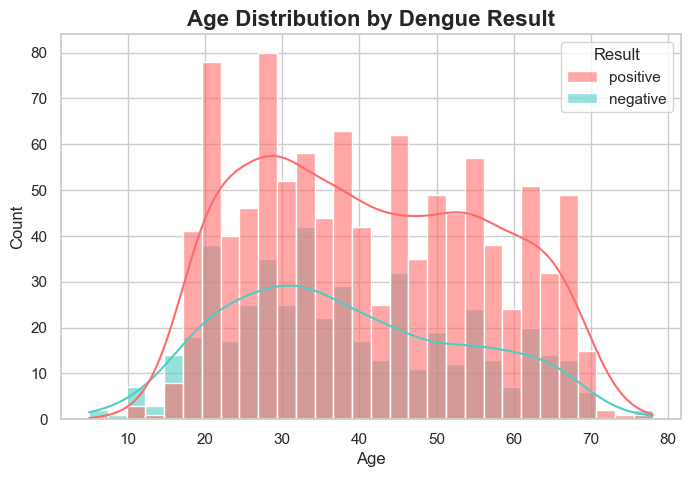

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Result', bins=30, kde=True, palette=['#FF6B6B','#4ECDC4'], alpha=0.6)
plt.title('Age Distribution by Dengue Result', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


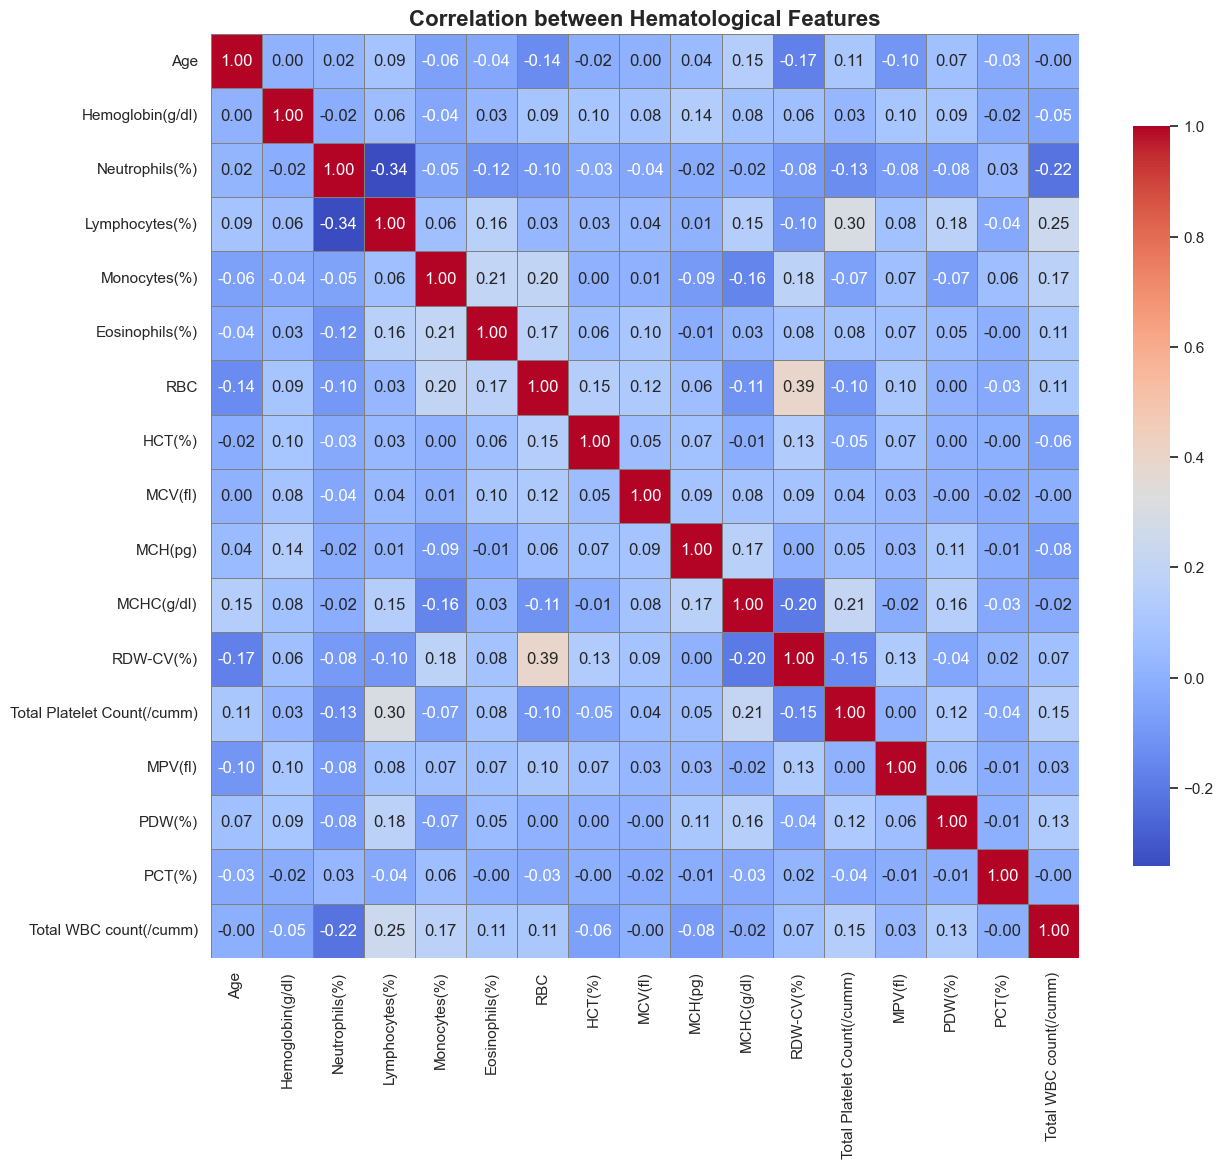

In [12]:
plt.figure(figsize=(14,12))
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Correlation between Hematological Features', fontsize=16, weight='bold')
plt.show()


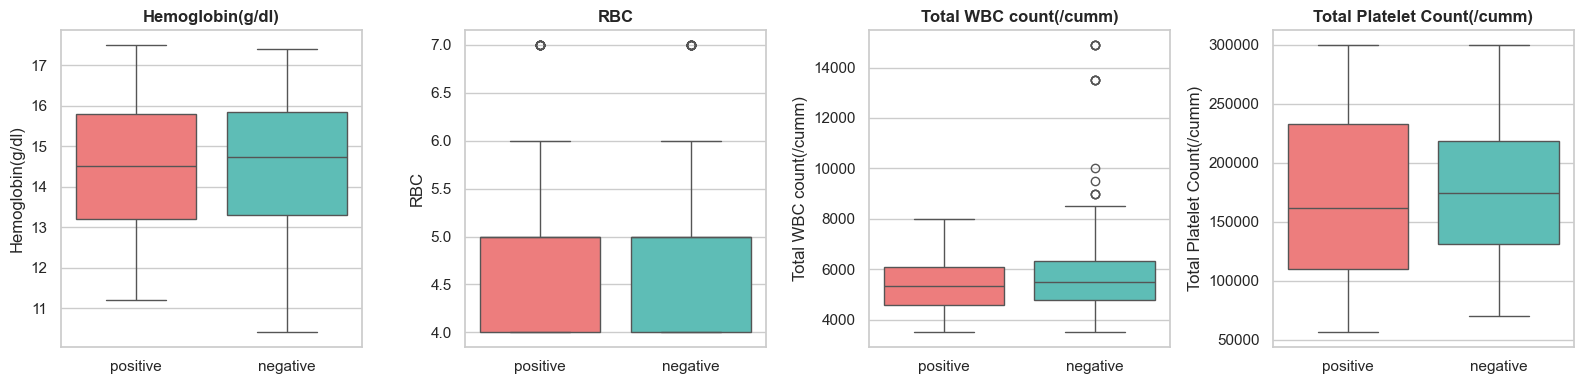

In [13]:
key_params = ['Hemoglobin(g/dl)', 'RBC', 'Total WBC count(/cumm)', 'Total Platelet Count(/cumm)']

plt.figure(figsize=(16,4))
for i, col in enumerate(key_params, 1):
    plt.subplot(1, len(key_params), i)
    sns.boxplot(x='Result', y=col, data=df, palette=['#FF6B6B','#4ECDC4'])
    plt.title(col, fontsize=12, weight='bold')
    plt.xlabel('')
plt.tight_layout()
plt.show()


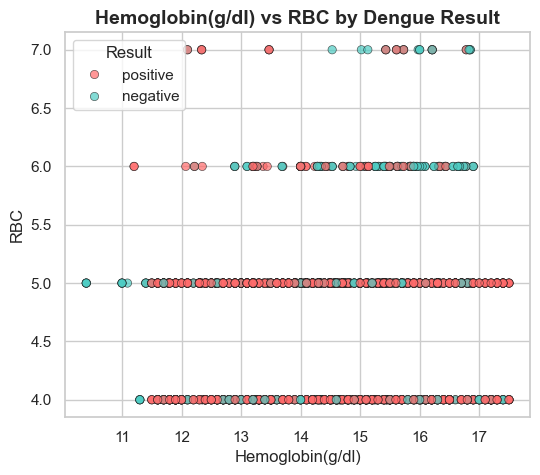

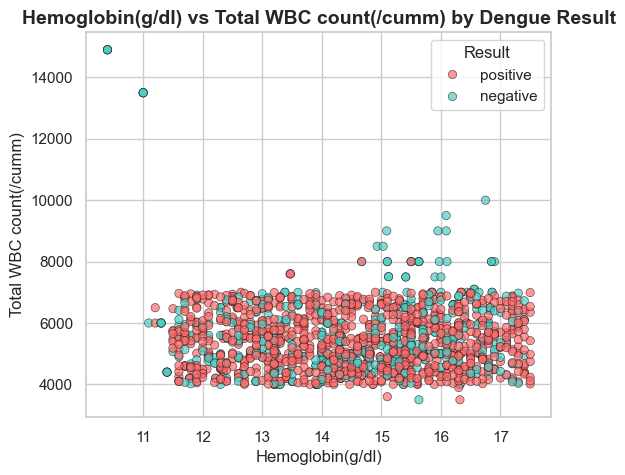

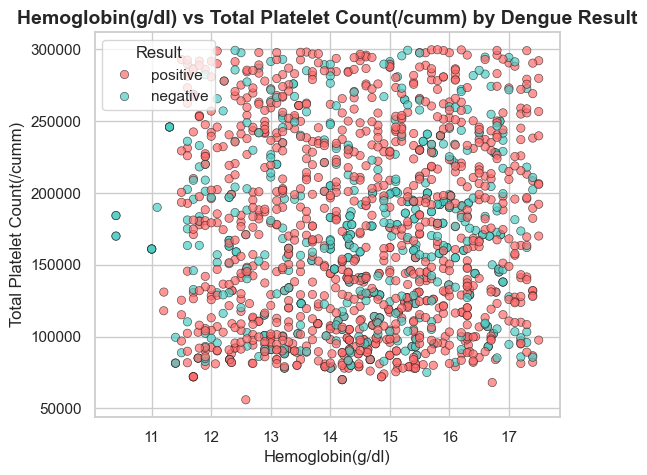

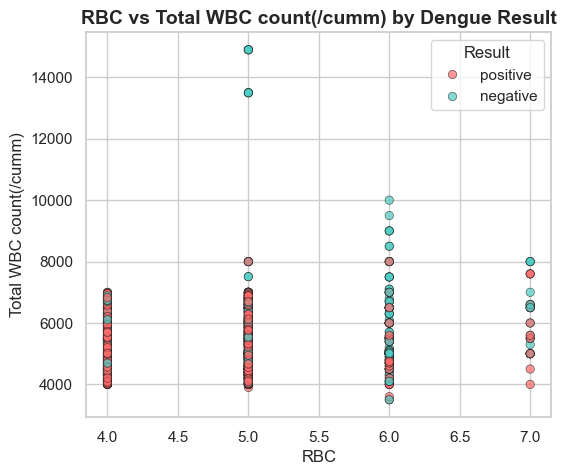

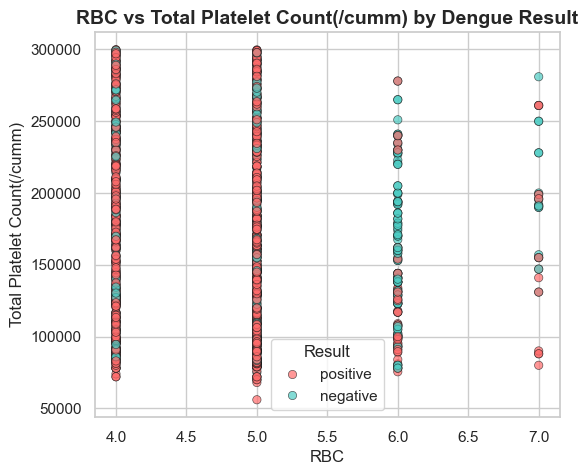

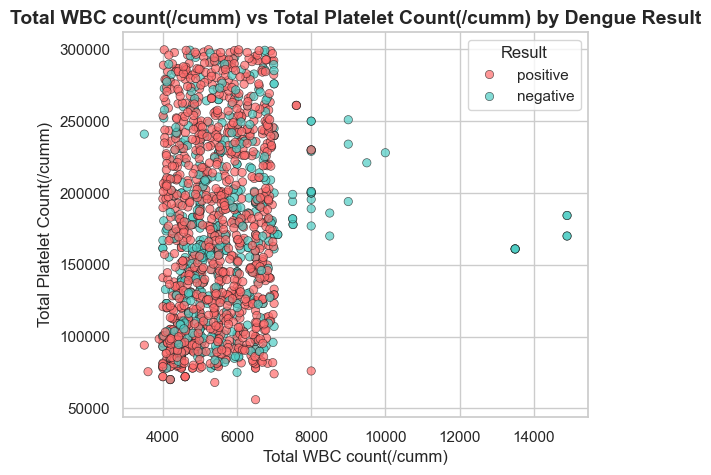

In [15]:
# Key hematological features to compare
features = ['Hemoglobin(g/dl)', 'RBC', 'Total WBC count(/cumm)', 'Total Platelet Count(/cumm)']

# Loop through all pair combinations
from itertools import combinations

for f1, f2 in combinations(features, 2):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x=f1, y=f2, hue='Result', palette=['#FF6B6B','#4ECDC4'], alpha=0.7, edgecolor='k')
    plt.title(f'{f1} vs {f2} by Dengue Result', fontsize=14, weight='bold')
    plt.xlabel(f1, fontsize=12)
    plt.ylabel(f2, fontsize=12)
    plt.legend(title='Result')
    plt.show()


## Preprocessing

In [16]:
# Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
['Age', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)', 'Monocytes(%)', 'Eosinophils(%)', 'RBC', 'HCT(%)', 'MCV(fl)', 'MCH(pg)', 'MCHC(g/dl)', 'RDW-CV(%)', 'Total Platelet Count(/cumm)', 'MPV(fl)', 'PDW(%)', 'PCT(%)', 'Total WBC count(/cumm)']

Categorical Columns:
['Gender', 'Result']


### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode Gender
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0 (or vice versa)

# Encode Result
df['Result'] = le.fit_transform(df['Result'])  # Negative=0, Positive=1 (or vice versa)

# Verify
print(df[['Gender', 'Result']].head())


   Gender  Result
0       1       1
1       1       1
2       1       0
3       0       0
4       1       0


In [18]:
df.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,1,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,1
1,1,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,1
2,1,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,0
3,0,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,0
4,1,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,0


In [19]:
# Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
['Gender', 'Age', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)', 'Monocytes(%)', 'Eosinophils(%)', 'RBC', 'HCT(%)', 'MCV(fl)', 'MCH(pg)', 'MCHC(g/dl)', 'RDW-CV(%)', 'Total Platelet Count(/cumm)', 'MPV(fl)', 'PDW(%)', 'PCT(%)', 'Total WBC count(/cumm)', 'Result']

Categorical Columns:
[]


## Outlier Treatment

Features with outliers: ['Neutrophils(%)', 'Lymphocytes(%)', 'Monocytes(%)', 'Eosinophils(%)', 'RBC', 'MCH(pg)', 'MCHC(g/dl)', 'RDW-CV(%)', 'PDW(%)', 'PCT(%)', 'Total WBC count(/cumm)']


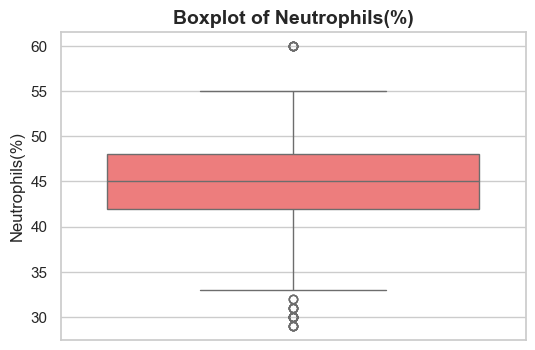

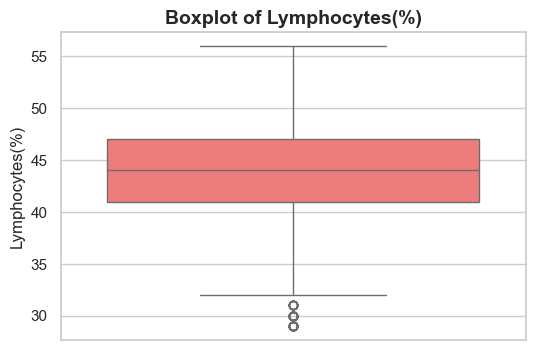

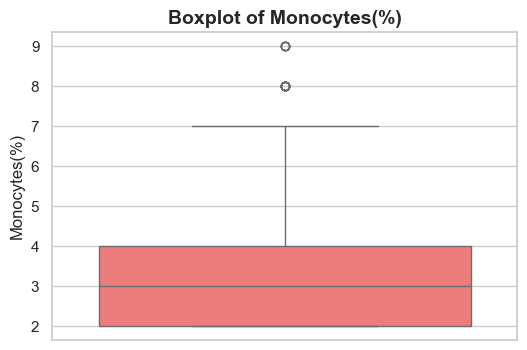

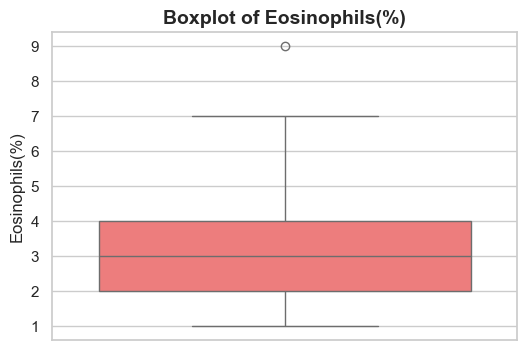

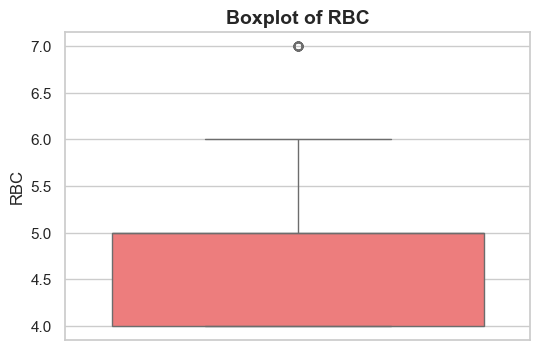

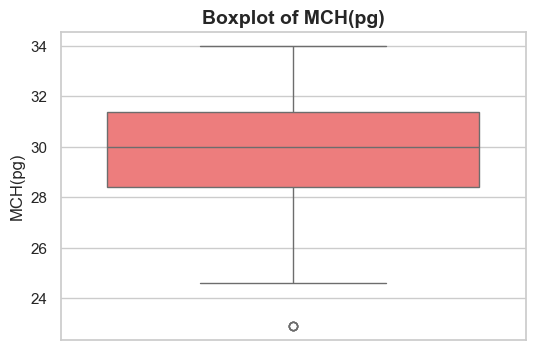

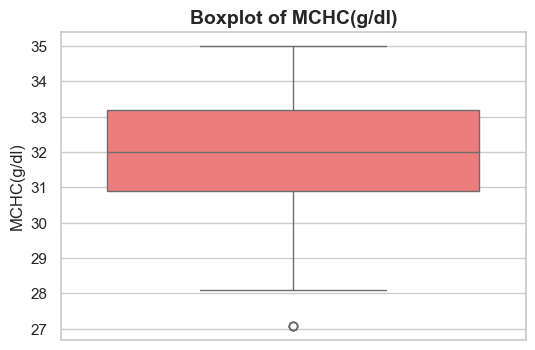

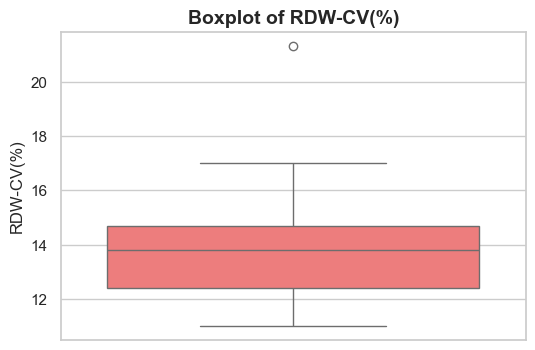

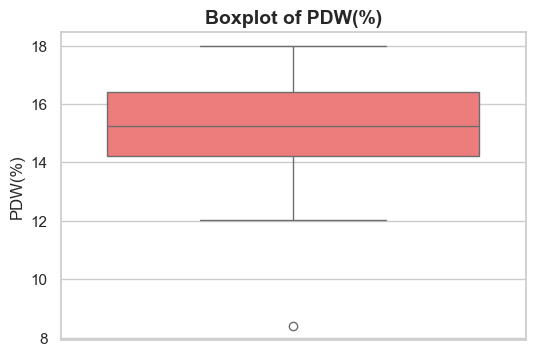

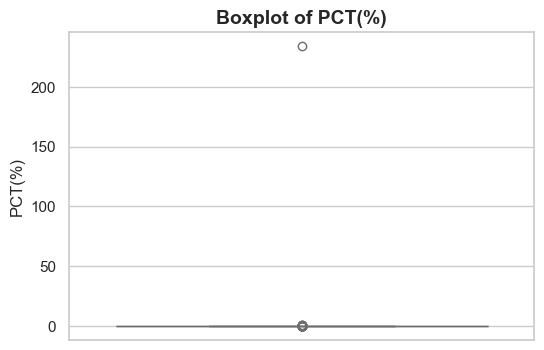

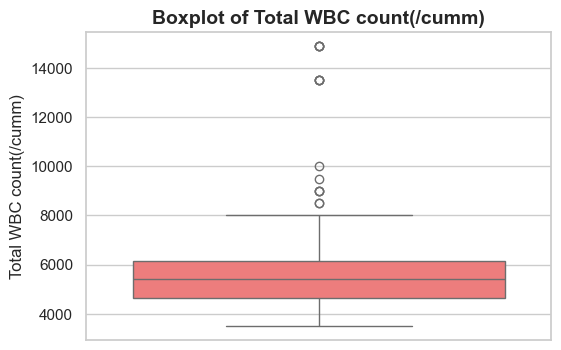

In [22]:
# Select numerical columns (exclude target)
numeric_cols = df.select_dtypes(include=np.number).columns.drop('Result')

# Identify features with outliers using IQR
features_with_outliers = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        features_with_outliers.append(col)

print("Features with outliers:", features_with_outliers)

# Plot each feature separately
for col in features_with_outliers:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='#FF6B6B')
    plt.title(f'Boxplot of {col}', fontsize=14, weight='bold')
    plt.ylabel(col, fontsize=12)
    plt.show()


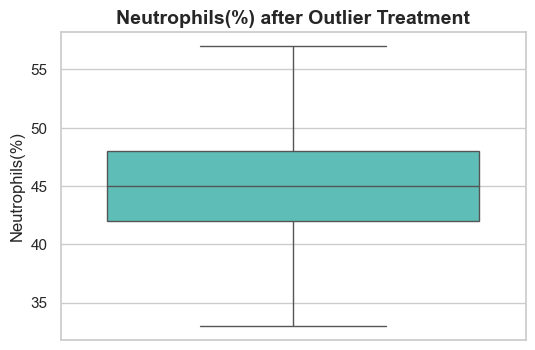

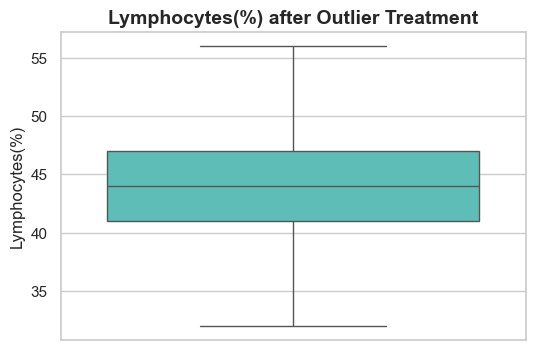

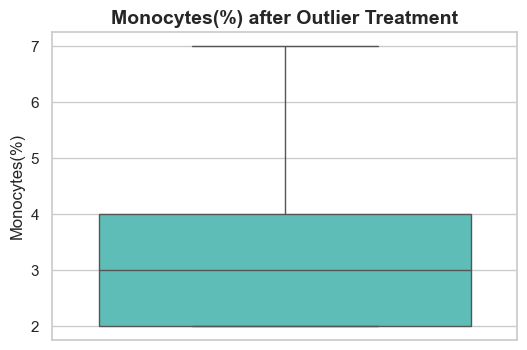

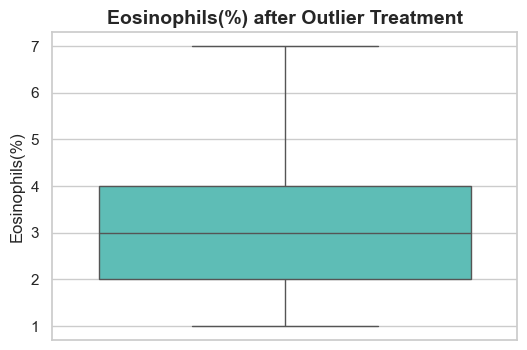

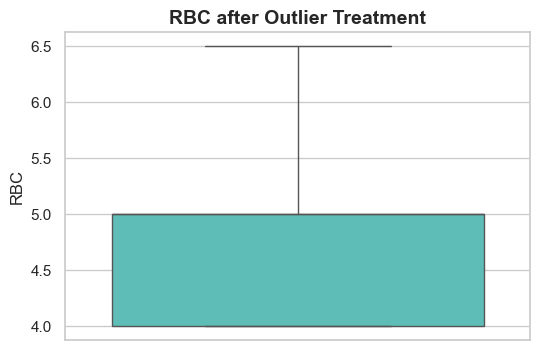

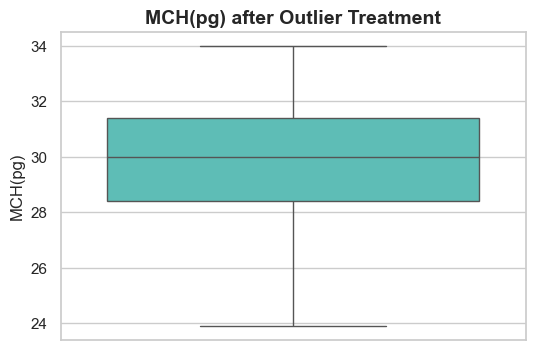

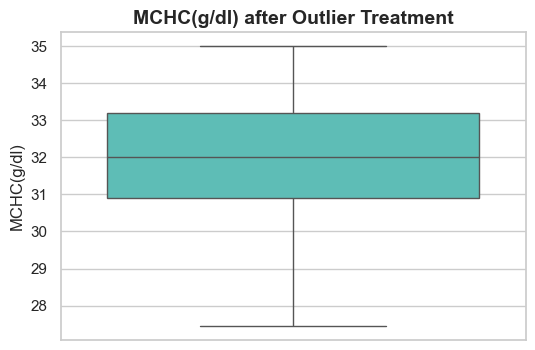

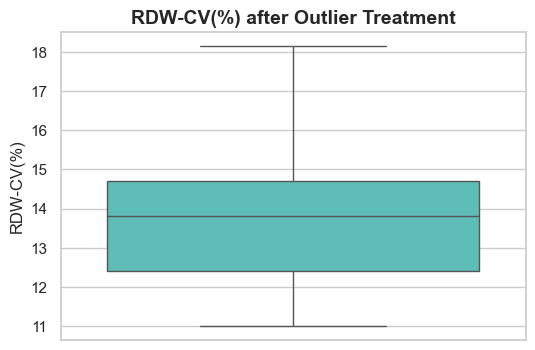

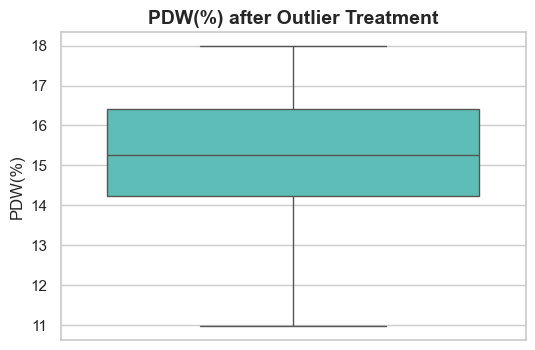

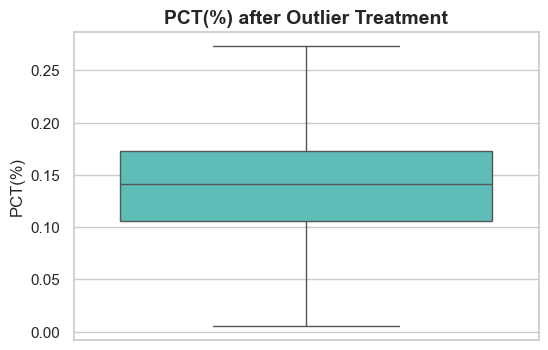

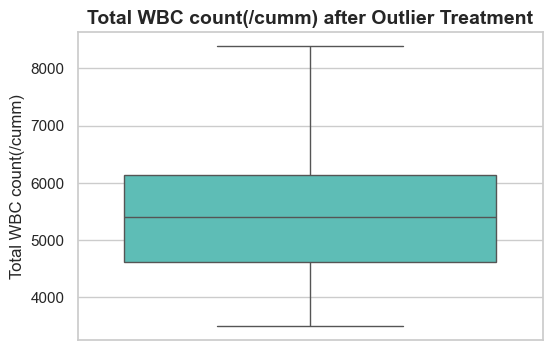

In [23]:
# Treat outliers by clipping
for col in features_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Clip values outside the bounds
    df[col] = df[col].clip(lower, upper)

# Verify by plotting again (optional)
for col in features_with_outliers:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='#4ECDC4')
    plt.title(f'{col} after Outlier Treatment', fontsize=14, weight='bold')
    plt.ylabel(col, fontsize=12)
    plt.show()


## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (exclude target)
numeric_cols = df.select_dtypes(include=np.number).columns.drop('Result')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verify
df[numeric_cols].head()


,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm)
0,1.058853,-1.263684,0.176163,0.841856,0.709622,-0.221795,-1.088620,0.354309,0.788362,1.121628,-0.148669,-0.808199,-1.430840,-0.943155,1.309711,0.061038,-0.291225,-0.365686
1,1.058853,-0.674724,0.299118,0.599941,1.134363,2.376623,-0.082571,0.354309,1.293234,1.139764,-0.743638,-1.647890,-1.290128,-1.190025,1.191845,0.347118,-0.271416,-0.993704
2,1.058853,0.699516,1.098328,-0.851545,0.921992,0.644344,1.929527,0.354309,1.377379,0.668220,0.694204,0.419044,-0.094069,0.167761,0.956115,0.776238,-0.093140,0.576340
3,-0.944418,-0.936484,-1.360777,0.358027,1.134363,3.242763,1.929527,0.354309,-0.333574,0.033450,0.297558,-1.001974,0.750207,-0.094538,-1.754785,1.276879,-0.489310,-0.470356
4,1.058853,-0.347524,0.975372,0.116113,0.497251,0.644344,0.923478,0.354309,1.497987,0.214813,-0.386656,-1.841666,1.101989,-0.279691,1.097553,-2.127476,0.303029,-0.889034


## Feature Engineering

In [28]:
# Hematological ratios
df['NLR'] = df['Neutrophils(%)'] / df['Lymphocytes(%)']
df['PLR'] = df['Total Platelet Count(/cumm)'] / df['Lymphocytes(%)']
df['MLR'] = df['Monocytes(%)'] / df['Lymphocytes(%)']
df.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),...,RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result,NLR,PLR,MLR
0,1.058853,-1.263684,0.176163,0.841856,0.709622,-0.221795,-1.088620,0.354309,0.788362,1.121628,...,-1.430840,-0.943155,1.309711,0.061038,-0.291225,-0.365686,1,1.186345,-1.329095,-0.312554
1,1.058853,-0.674724,0.299118,0.599941,1.134363,2.376623,-0.082571,0.354309,1.293234,1.139764,...,-1.290128,-1.190025,1.191845,0.347118,-0.271416,-0.993704,1,0.528880,-1.049069,2.095117
2,1.058853,0.699516,1.098328,-0.851545,0.921992,0.644344,1.929527,0.354309,1.377379,0.668220,...,-0.094069,0.167761,0.956115,0.776238,-0.093140,0.576340,0,-0.923592,0.181955,0.698861
3,-0.944418,-0.936484,-1.360777,0.358027,1.134363,3.242763,1.929527,0.354309,-0.333574,0.033450,...,0.750207,-0.094538,-1.754785,1.276879,-0.489310,-0.470356,0,0.315619,-0.083341,2.858665
4,1.058853,-0.347524,0.975372,0.116113,0.497251,0.644344,0.923478,0.354309,1.497987,0.214813,...,1.101989,-0.279691,1.097553,-2.127476,0.303029,-0.889034,0,0.233509,-0.562475,1.295812


In [29]:
df['MPV_PLT_Ratio'] = df['MPV(fl)'] / df['Total Platelet Count(/cumm)']
df['PDW_PLT_Ratio'] = df['PDW(%)'] / df['Total Platelet Count(/cumm)']
df.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),...,MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result,NLR,PLR,MLR,MPV_PLT_Ratio,PDW_PLT_Ratio
0,1.058853,-1.263684,0.176163,0.841856,0.709622,-0.221795,-1.088620,0.354309,0.788362,1.121628,...,1.309711,0.061038,-0.291225,-0.365686,1,1.186345,-1.329095,-0.312554,-1.388649,-0.064716
1,1.058853,-0.674724,0.299118,0.599941,1.134363,2.376623,-0.082571,0.354309,1.293234,1.139764,...,1.191845,0.347118,-0.271416,-0.993704,1,0.528880,-1.049069,2.095117,-1.001530,-0.291690
2,1.058853,0.699516,1.098328,-0.851545,0.921992,0.644344,1.929527,0.354309,1.377379,0.668220,...,0.956115,0.776238,-0.093140,0.576340,0,-0.923592,0.181955,0.698861,5.699267,4.627047
3,-0.944418,-0.936484,-1.360777,0.358027,1.134363,3.242763,1.929527,0.354309,-0.333574,0.033450,...,-1.754785,1.276879,-0.489310,-0.470356,0,0.315619,-0.083341,2.858665,18.561590,-13.506445
4,1.058853,-0.347524,0.975372,0.116113,0.497251,0.644344,0.923478,0.354309,1.497987,0.214813,...,1.097553,-2.127476,0.303029,-0.889034,0,0.233509,-0.562475,1.295812,-3.924162,7.606521


### 1️⃣ Hematological Ratios

Hematological ratios are derived features that capture the balance between different types of blood cells and immune response indicators.  

- **Neutrophil-to-Lymphocyte Ratio (NLR):** Reflects inflammatory response; higher values may indicate active infection.  
- **Platelet-to-Lymphocyte Ratio (PLR):** Can indicate severity of dengue, as platelet count typically drops during infection.  
- **Monocyte-to-Lymphocyte Ratio (MLR):** Provides additional insight into immune system changes.

These ratios help the machine learning model **better distinguish between dengue-positive and negative cases** by emphasizing relationships between blood cell types rather than individual counts alone.


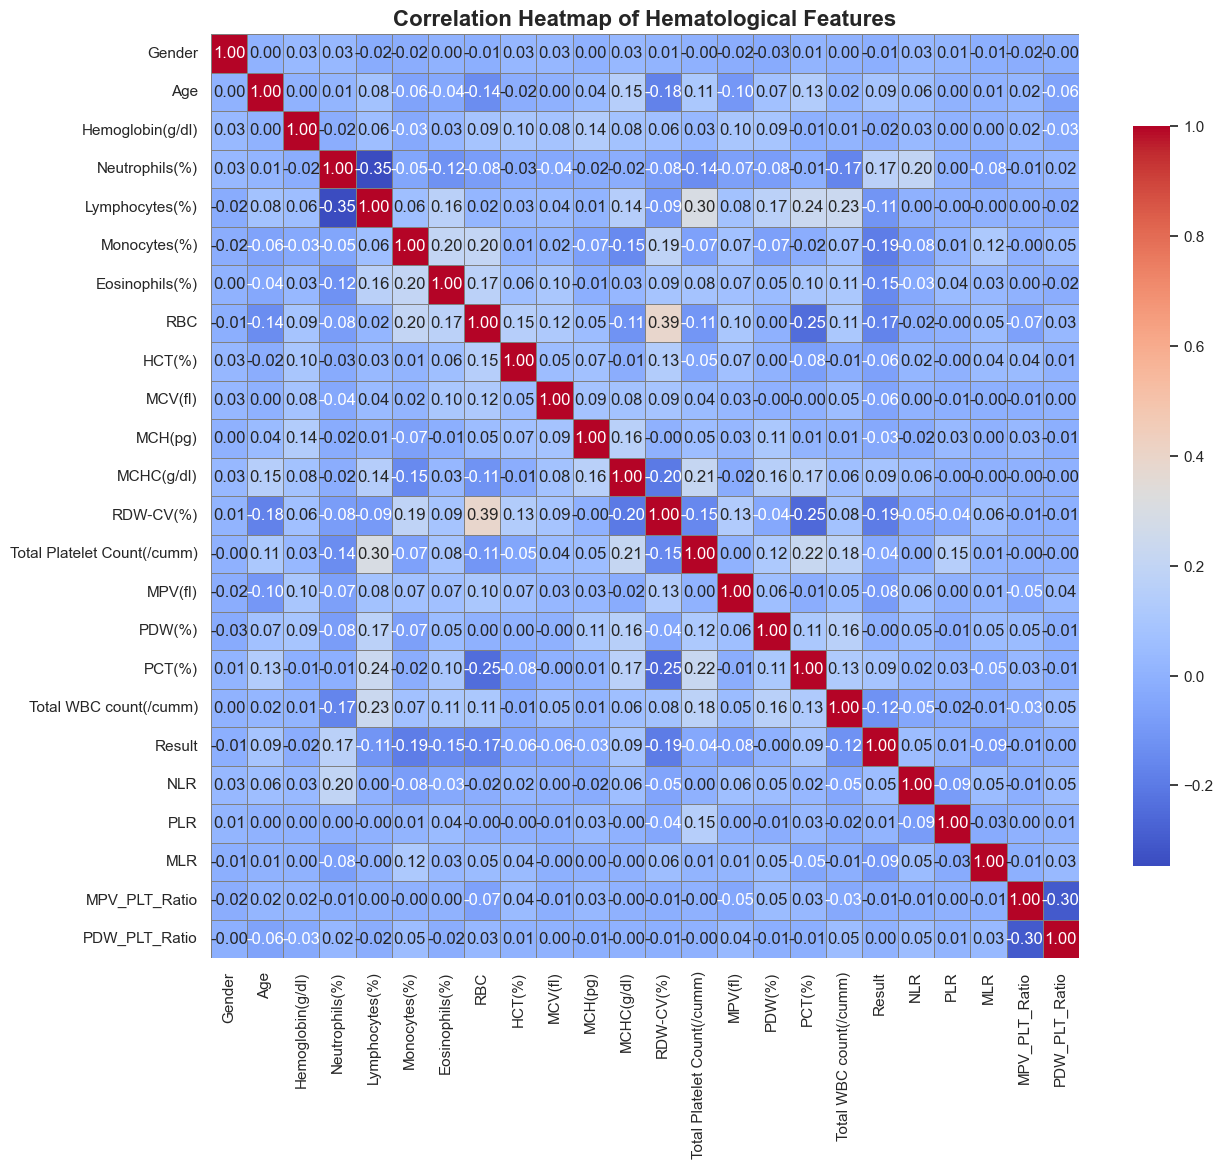

In [30]:
# Select numeric columns for correlation (exclude non-numeric like Gender if already encoded is fine)
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Hematological Features', fontsize=16, weight='bold')
plt.show()


## Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Result', axis=1)  # all original + engineered features
y = df['Result']               # target

# Split data: 80% train, 20% test, stratify to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (1218, 23)
X_test shape: (305, 23)
y_train distribution:
 Result
1    0.683908
0    0.316092
Name: proportion, dtype: float64
y_test distribution:
 Result
1    0.685246
0    0.314754
Name: proportion, dtype: float64


In [32]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# 1️⃣ Handle class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 2️⃣ Define models and hyperparameters
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced']  # handle imbalance
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(solver='liblinear', random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'class_weight': ['balanced']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1],
            'scale_pos_weight': [1, np.sum(y_train_res==0)/np.sum(y_train_res==1)]  # balance classes
        }
    }
}

# 3️⃣ Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for model_name, mp in models.items():
    print(f"\nTraining {model_name} with CV and hyperparameter tuning...")
    grid = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=skf,
        scoring='f1',  # use F1 due to class imbalance
        n_jobs=-1
    )
    grid.fit(X_train_res, y_train_res)
    best_models[model_name] = grid.best_estimator_
    print(f"Best params for {model_name}: {grid.best_params_}")
    print(f"Best CV F1-score: {grid.best_score_:.4f}")

# 4️⃣ Evaluate on Test Set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training RandomForest with CV and hyperparameter tuning...
Best params for RandomForest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1-score: 0.8477

Training LogisticRegression with CV and hyperparameter tuning...
Best params for LogisticRegression: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}
Best CV F1-score: 0.6444

Training XGBoost with CV and hyperparameter tuning...
Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1}
Best CV F1-score: 0.8357

=== RandomForest Evaluation ===
Accuracy: 0.7639344262295082
F1 Score: 0.8427947598253275
ROC-AUC: 0.6930322966507177
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        96
           1       0.78      0.92      0.84       209

    accuracy                           0.76       305
   macro avg       0.74      0.67      0.68       305
weighted